<a href="https://colab.research.google.com/github/BelideSaiTeja/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUCTION**

In this Machine Larning Project, Dataset is collected from kaggle (https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset) and will be using Machine Learning to make predictions on whether a person is suffering from Heart Disease or not. 

**Importing the required libraries**

First importing all the necessary libraries that will be using in this project. Libraries such as <code>numpy</code> and <code>pandas</code> are used to start with. For visualization, pyplot subpackage of <code>matplotlib</code>, rcParams to add styling to the plots and rainbow for colors. For implementing Machine Learning models and processing of data, <code>sklearn</code> library is used.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns
%matplotlib inline

For processing the data, few libraries are imported. To split the availabe dataset for testing and training data, <code>train_test_split</code> method is used.

In [2]:
from sklearn.model_selection import train_test_split

Importing the Machine Learning model LogisticRegression that will be used in the project. To verify the accuracy of the predicted model, <code>accuracy_score</code> is imported from standard library.

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Import Dataset**


All the necessary libraries are imported, now import the dataset and take a look at it. The dataset is stored in <code>heart_disease_data.csv</code>. Using the pandas <code>read_csv</code> method to read the dataset.

In [4]:
data = pd.read_csv('/content/heart_disease_data.csv')

The dataset is loaded into the variable data.Taking a glimpse of the data using the <code>sample()</code>, <code>shape</code>, <code>describe()</code> and <code>info()</code>

In [5]:
# printing five samples of data
data.sample(n = 5)

,ï»¿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
253,67,1,0,100,299,0,0,125,1,0.9,1,2,2,0
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
267,49,1,2,118,149,0,0,126,0,0.8,2,3,2,0


In [6]:
# finding no. of rows and columns in the DataFrame
data.shape

(303, 14)

In [7]:
data.describe()

,ï»¿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# getting some more info from the data (columns, datatypes,...)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ï»¿age    303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Data pre-processing**

After exploring the dataset, there is a need to alter some of the column names. The <code>rename()</code> method is used to change the column names.

In [9]:
data.rename(columns = {'ï»¿age' : 'age'}, inplace = True)

Checking for any missing values in the dataset. If possible, missing values will be filled else alternate approach is followed to make data consistent and free from noisy in the data. <code>isnull()</code> method is used to find missing data in the dataset.

In [10]:
# check for missing values (if any)
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Visualizing Data**

Visualizations are done to better understand the data and looking to do further process.

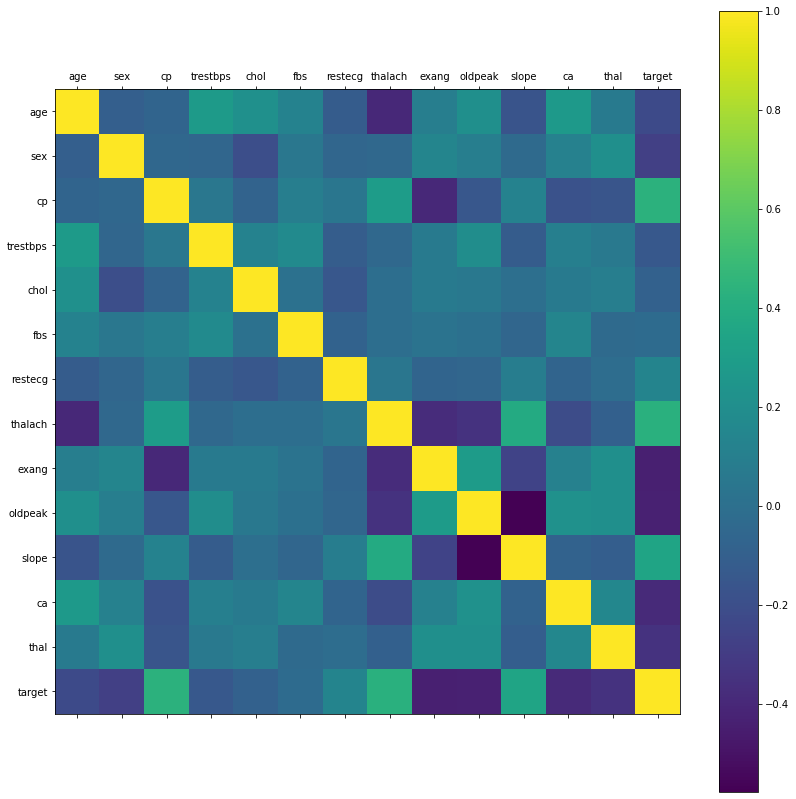

In [11]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(data.corr())
plt.yticks(np.arange(data.shape[1]), data.columns)
plt.xticks(np.arange(data.shape[1]), data.columns)
plt.colorbar();

Taking look at the correlation matrix above, it is observed that a few features have negative correlation with the target value while some have positive correlation.

Looking at the histograms for each variable.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

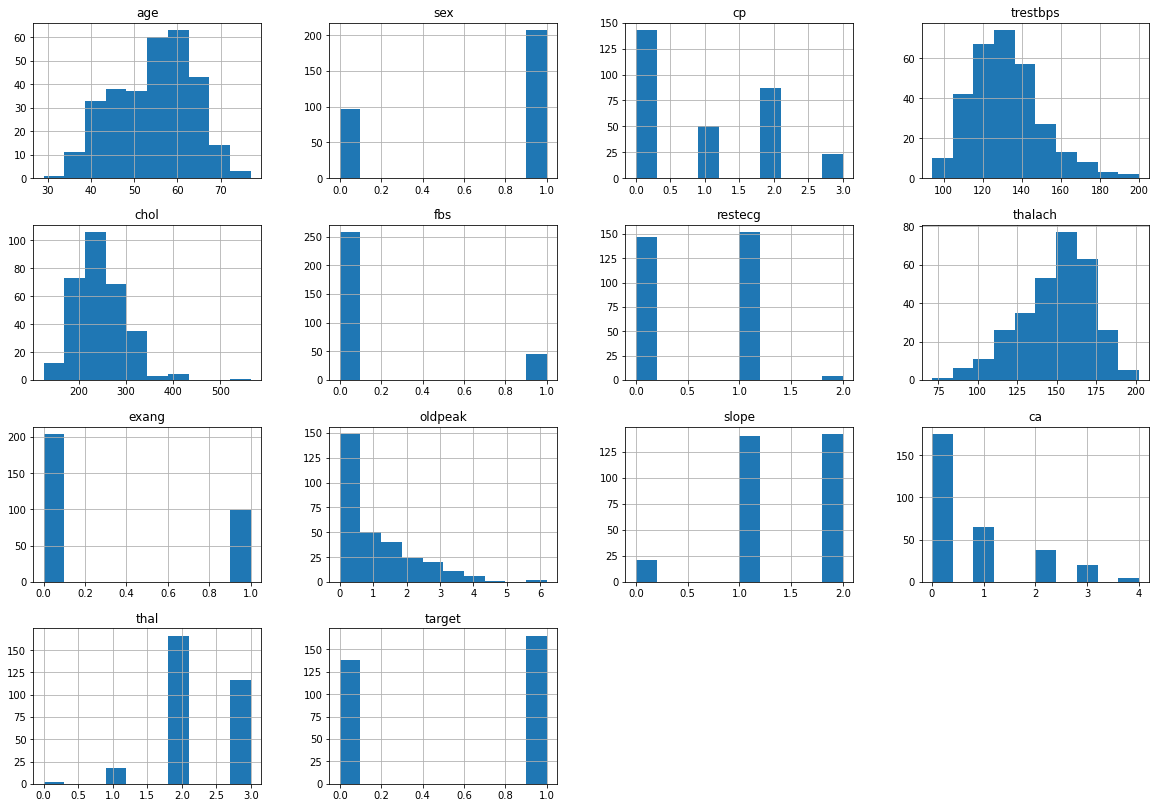

In [12]:
data.hist()

By seeing the histograms above, it is observed that each feature has different range of distribution.

It's always good to work with a dataset where the target class are of approximately equal size. Checking for the same as follows.

Text(0.5, 1.0, 'Count of each target')

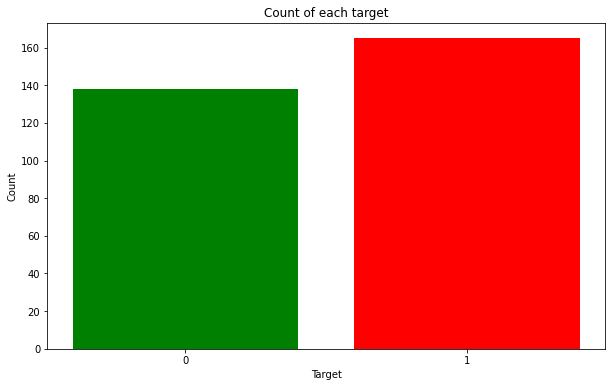

In [13]:
rcParams['figure.figsize'] = 10, 6
plt.bar(data['target'].unique(), data['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Count of each target')

In [14]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 ---> Diseased Heart

0 ---> Not a Diseased Heart


The number of target values are almost equally distributed in the given data, which is expected for accurate predictions without dropping/increasing the data.

**Machine Learning Model Selection**

**Splitting features and target values separately**

X ---> features

Y --->target

In [15]:
X = data.drop(columns = 'target', axis = 1)
Y = data['target']

In [16]:
# printing features
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [17]:
# Printing target values correspondingly
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


*Splitting data into **training** and **test** data* by using test_train_split method.

X_train ---> training data containing features 

X_test ---> testing data containing features

Y_train ---> target values corresponding to X_train features

Y_test ---> target values corresponding to X_test features

Points considered during Splitting the data

*   Splitting X, Y into training and test data
*   20 % of data is taken into test data
*   Splitting is done by considering almost equal no.s of target values in training data by <code>stratify</code> method.



In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 3)

In [19]:
# printing no. of columns in training an test data
print('Test data shape: {}'.format(X.shape))
print('Training data shape: {} '.format(X_train.shape))
print('Test data shape: {} '.format(X_test.shape))

Test data shape: (303, 13)
Training data shape: (242, 13) 
Test data shape: (61, 13) 


**Selection of Model & Taining**

Logistic Model

In [20]:
model = LogisticRegression()

Training the Logistic Regression model by inputing training data using <code>fit()</code> method.

In [21]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Performance of Model**

Model Evaluation

Accuracy Score

In [22]:
# accuracy of training data
X_train_prediction = model.predict(X_train)
training_data_Accuracy = accuracy_score(X_train_prediction, Y_train)

In [23]:
print('Accuracy of training data is ', training_data_Accuracy)

Accuracy of training data is  0.8636363636363636


In [24]:
# accuracy of test data
X_test_prediction = model.predict(X_test)
test_data_Accuracy = accuracy_score(X_test_prediction, Y_test)

In [25]:
print('Accuracy of test data is ', test_data_Accuracy)

Accuracy of test data is  0.8032786885245902


The accuracy of 'train' data and 'test' data are almost same, which implies the model fit the data pretty well !

**Building a predictive system**

In [26]:
input_data = (43,1,0,120,177,0,0,120,1,2,1,0,3)

# change the input_data to numpy array
input_data_as_numpy = np.asarray(input_data)

# reshape the numpy array as prediction is for only one instance
input_data_reshaped = input_data_as_numpy.reshape(1, -1)

# prediction
prediction_of_input_data = model.predict(input_data_reshaped);
# print(prediction_of_input_data)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [27]:
if (prediction_of_input_data[0] == 0):
  print('Person not suffering with Heart disease')
else:
  print('Person suffering with Heart disease')

Person not suffering with Heart disease


**CONCLUSION**

In this project, Machine Learning is ued to predict whether a person is suffering from a heart disease. After importing the data, analysed it using plots. Then applied Machine Learning algorithm, Logistic Regression. And varied parameters across the model to improve their scores. In the end, achieved the highest score of 85% with the Logistic Regression model.